In [1]:
# default_exp diffusion_distance_flow_embedder
from nbdev.showdoc import *
import numpy as np
import matplotlib.pyplot as plt
import torch
import directed_graphs
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
%load_ext autoreload
%autoreload 2

# Diffusion Distance Based Loss

Explorations and visualizations.

In this notebook, we'll subclass the 05c01a FETrainer and tailor it to the Mean Squared Error loss function in MFE.

In [ ]:
# export
from directed_graphs.multiscale_flow_embedder import MultiscaleDiffusionFlowEmbedder
from directed_graphs.flow_embedding_training_utils import FETrainer, visualize_points, save_embedding_visualization
class DiffusionDistanceFlowEmbedder(FETrainer):
    def __init__(self, X, flows, labels, device = device):
        super().__init__(X, flows, labels, device = device)
        self.vizfiz = [
            save_embedding_visualization,
            visualize_points,
        ]
        loss_weights = {
            "diffusion":0,
            "smoothness":0,
            "reconstruction":0,
            "diffusion map regularization":1,
            "flow cosine loss": 1,
        }
        self.FE = MultiscaleDiffusionFlowEmbedder(
            X = X,
            flows = flows,
            sigma_graph = 1,
            flow_strength_graph = 1,
            device = device,
            use_embedding_grid = False,
        ).to(device)
        self.title = "Diffusion Distance FE"
        

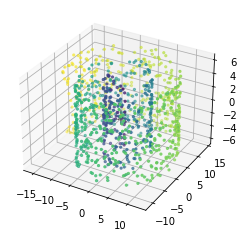

In [3]:
from directed_graphs.datasets import directed_swiss_roll_uniform, plot_directed_3d
X, flow, labels = directed_swiss_roll_uniform(num_nodes=1000, num_spirals=2.5, radius=1, height=12, xtilt=0, ytilt=0)
plot_directed_3d(X, flow, labels, mask_prob=0.5)

In [4]:
X = torch.tensor(X).float().to(device)
flow = torch.tensor(flow).float().to(device)
X = X.float().to(device)
flow = flow.float().to(device)

In [5]:
BOBO_FET = DiffusionDistanceFlowEmbedder(X, flow, labels = labels, device = device)

  0%|          | 0/100 [00:00<?, ?it/s]

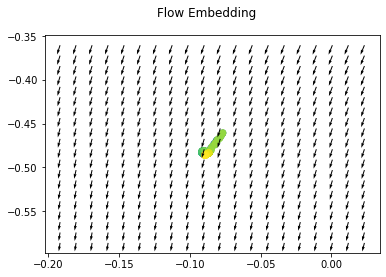

  1%|          | 1/100 [00:05<08:42,  5.28s/it]

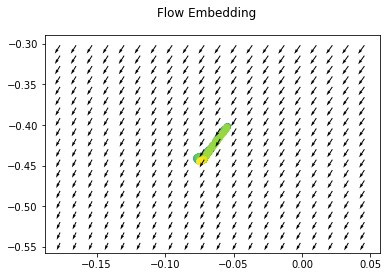

  2%|▏         | 2/100 [00:10<08:39,  5.31s/it]

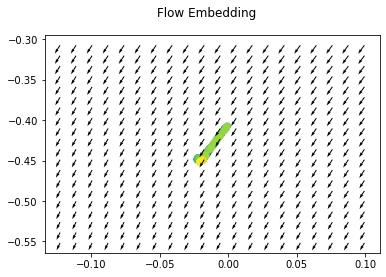

  3%|▎         | 3/100 [00:15<08:33,  5.30s/it]

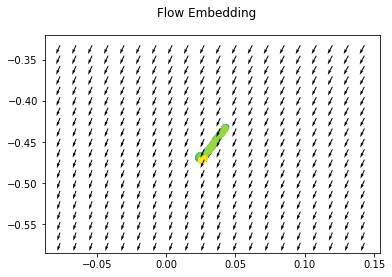

  4%|▍         | 4/100 [00:21<08:27,  5.29s/it]

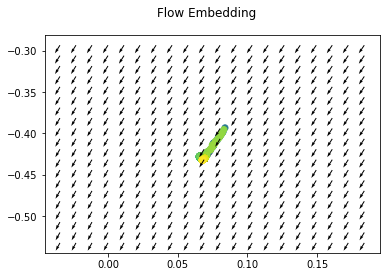

  5%|▌         | 5/100 [00:26<08:21,  5.28s/it]

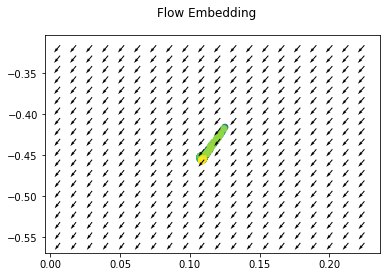

  6%|▌         | 6/100 [00:31<08:21,  5.33s/it]

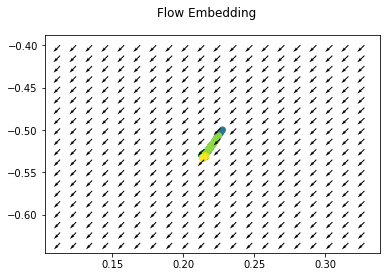

  7%|▋         | 7/100 [00:37<08:12,  5.30s/it]

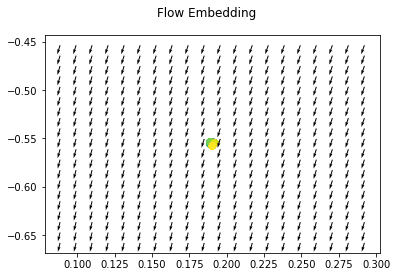

  8%|▊         | 8/100 [00:42<08:07,  5.30s/it]

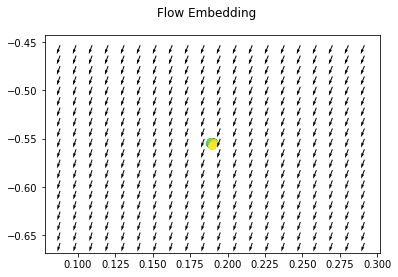

  9%|▉         | 9/100 [00:47<08:04,  5.32s/it]

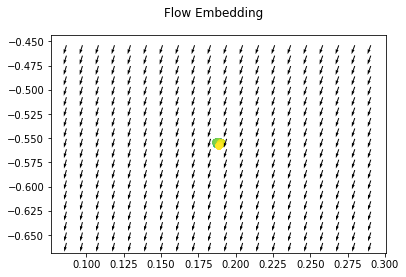

 10%|█         | 10/100 [00:53<08:00,  5.34s/it]

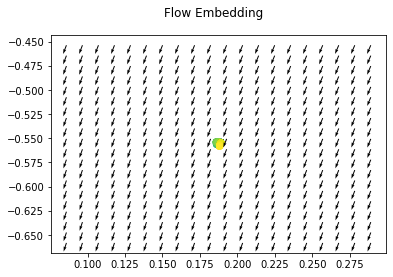

 11%|█         | 11/100 [00:58<07:55,  5.34s/it]

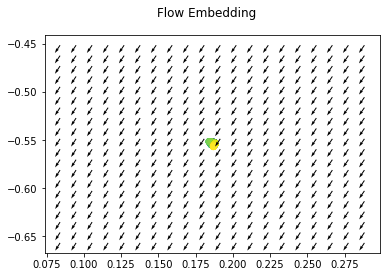

 12%|█▏        | 12/100 [01:03<07:53,  5.39s/it]

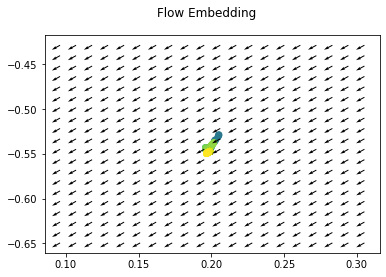

 13%|█▎        | 13/100 [01:09<07:43,  5.33s/it]

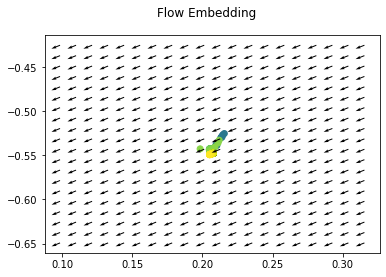

 14%|█▍        | 14/100 [01:14<07:35,  5.30s/it]

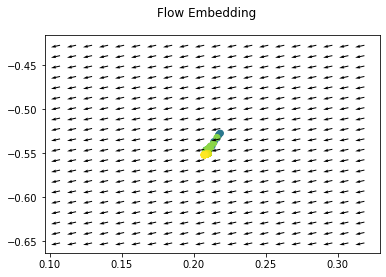

 15%|█▌        | 15/100 [01:19<07:27,  5.27s/it]

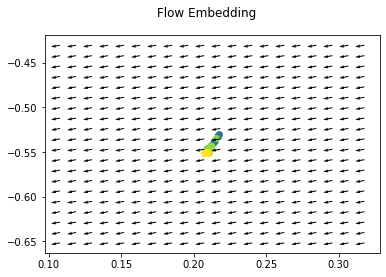

 16%|█▌        | 16/100 [01:24<07:20,  5.25s/it]

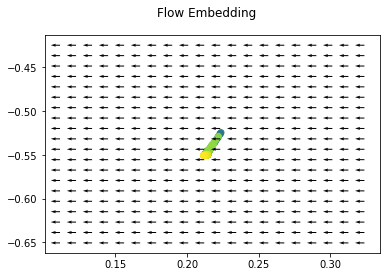

 17%|█▋        | 17/100 [01:30<07:16,  5.26s/it]

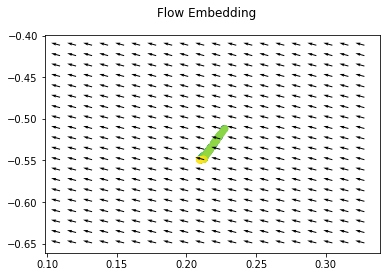

 18%|█▊        | 18/100 [01:35<07:10,  5.25s/it]

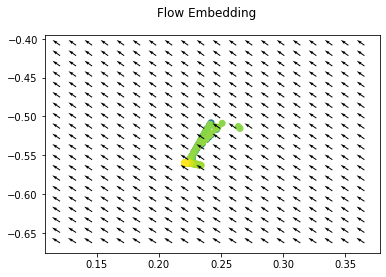

 19%|█▉        | 19/100 [01:40<07:10,  5.31s/it]

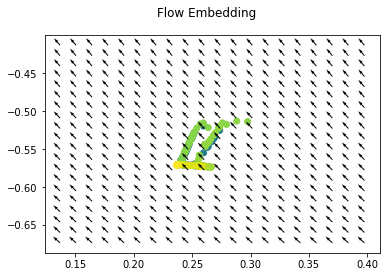

 20%|██        | 20/100 [01:46<07:03,  5.30s/it]

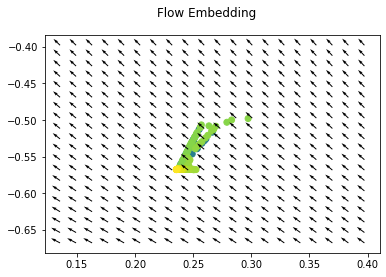

 21%|██        | 21/100 [01:51<06:58,  5.30s/it]

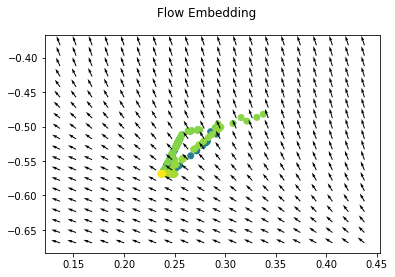

 22%|██▏       | 22/100 [01:56<06:53,  5.30s/it]

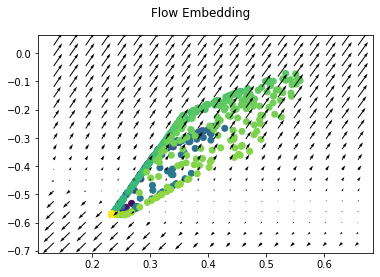

 23%|██▎       | 23/100 [02:01<06:48,  5.30s/it]

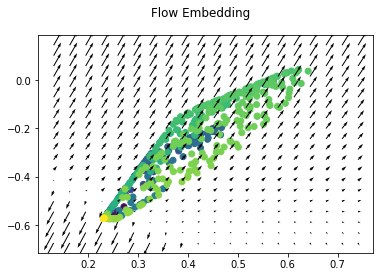

 24%|██▍       | 24/100 [02:07<06:41,  5.29s/it]

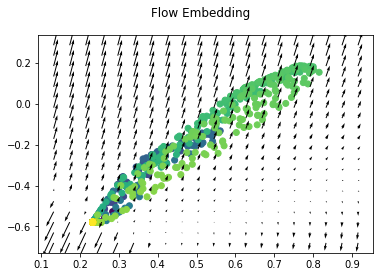

 25%|██▌       | 25/100 [02:12<06:42,  5.36s/it]

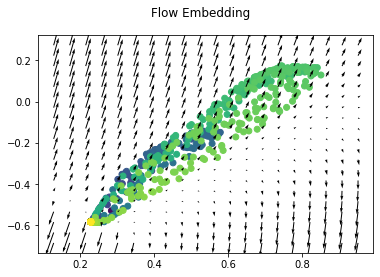

 26%|██▌       | 26/100 [02:17<06:33,  5.32s/it]

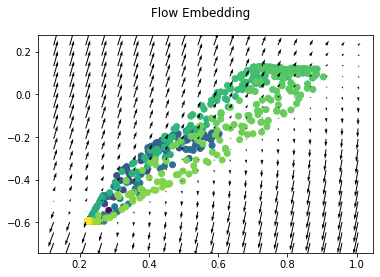

 27%|██▋       | 27/100 [02:23<06:26,  5.30s/it]

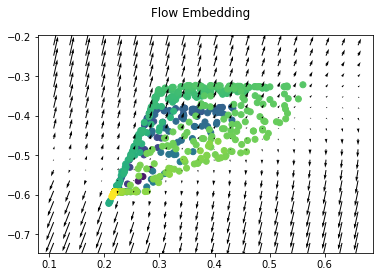

 28%|██▊       | 28/100 [02:28<06:21,  5.29s/it]

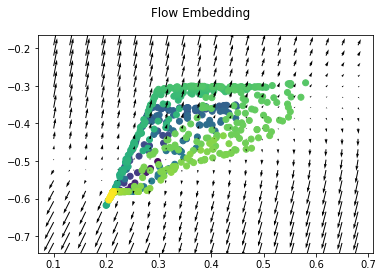

 29%|██▉       | 29/100 [02:33<06:16,  5.30s/it]

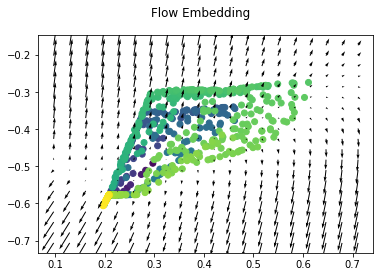

 30%|███       | 30/100 [02:39<06:10,  5.29s/it]

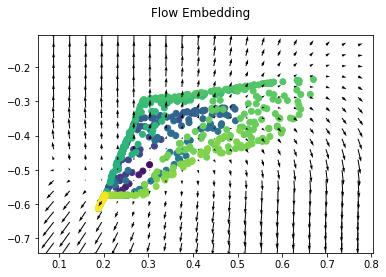

 31%|███       | 31/100 [02:44<06:05,  5.30s/it]

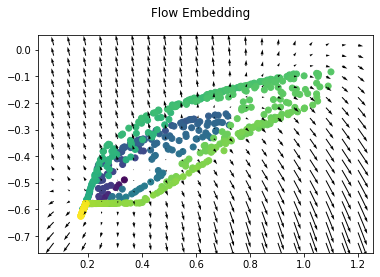

 32%|███▏      | 32/100 [02:49<06:03,  5.35s/it]

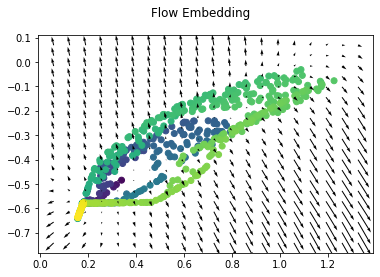

 33%|███▎      | 33/100 [02:55<05:58,  5.35s/it]

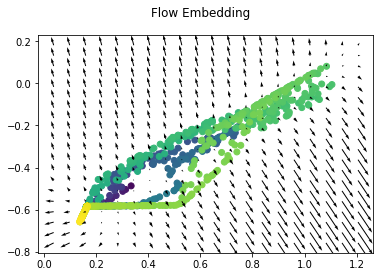

 34%|███▍      | 34/100 [03:00<05:51,  5.33s/it]

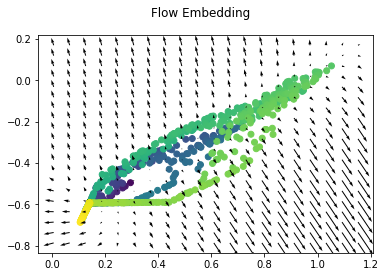

 35%|███▌      | 35/100 [03:05<05:45,  5.31s/it]

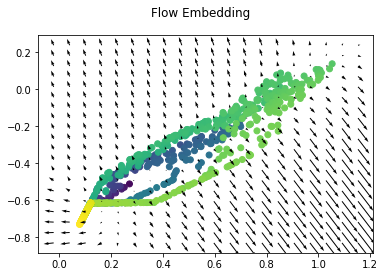

 36%|███▌      | 36/100 [03:11<05:39,  5.30s/it]

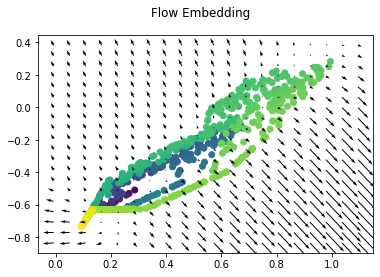

 37%|███▋      | 37/100 [03:16<05:33,  5.30s/it]

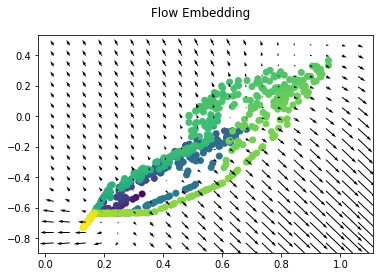

 38%|███▊      | 38/100 [03:21<05:31,  5.35s/it]

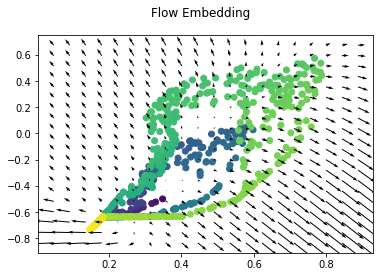

 39%|███▉      | 39/100 [03:27<05:28,  5.39s/it]

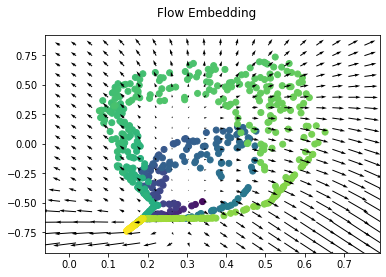

 40%|████      | 40/100 [03:32<05:22,  5.37s/it]

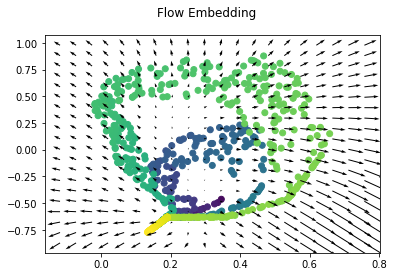

 41%|████      | 41/100 [03:37<05:15,  5.34s/it]

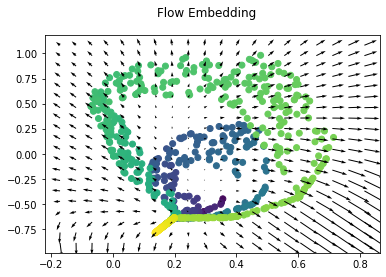

 42%|████▏     | 42/100 [03:43<05:09,  5.34s/it]

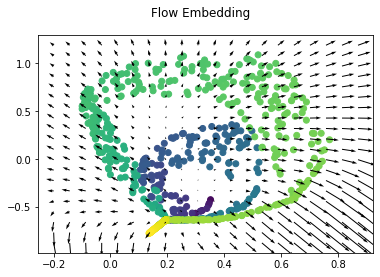

 43%|████▎     | 43/100 [03:48<05:02,  5.30s/it]

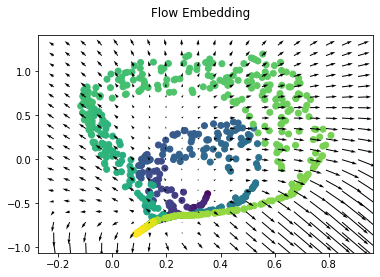

 44%|████▍     | 44/100 [03:53<04:56,  5.29s/it]

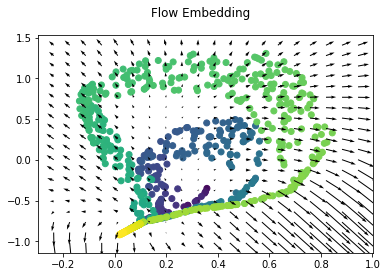

 45%|████▌     | 45/100 [03:59<04:53,  5.34s/it]

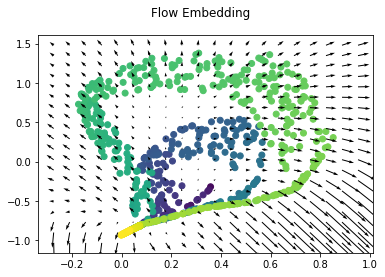

 46%|████▌     | 46/100 [04:04<04:47,  5.32s/it]

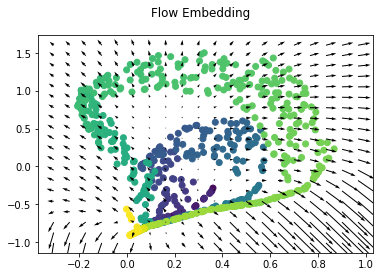

 47%|████▋     | 47/100 [04:09<04:41,  5.31s/it]

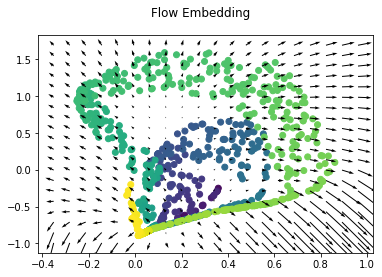

 48%|████▊     | 48/100 [04:15<04:36,  5.31s/it]

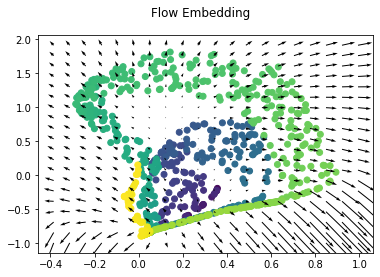

 49%|████▉     | 49/100 [04:20<04:31,  5.32s/it]

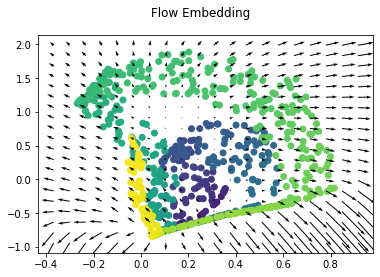

 50%|█████     | 50/100 [04:25<04:25,  5.32s/it]

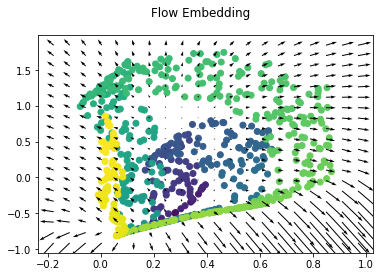

 51%|█████     | 51/100 [04:31<04:22,  5.37s/it]

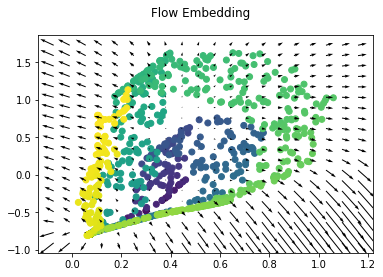

 52%|█████▏    | 52/100 [04:36<04:16,  5.34s/it]

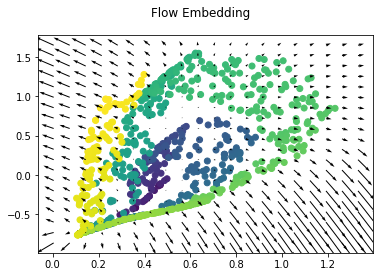

 53%|█████▎    | 53/100 [04:41<04:10,  5.32s/it]

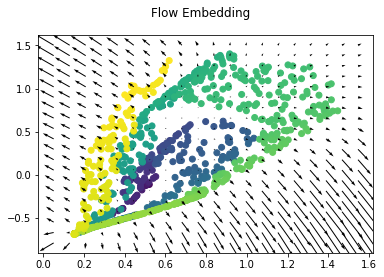

 54%|█████▍    | 54/100 [04:47<04:04,  5.32s/it]

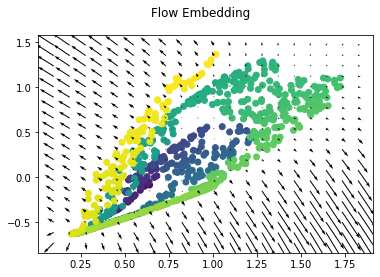

 55%|█████▌    | 55/100 [04:52<03:58,  5.31s/it]

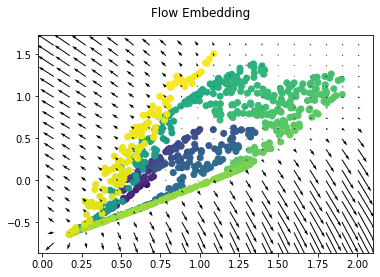

 56%|█████▌    | 56/100 [04:57<03:53,  5.31s/it]

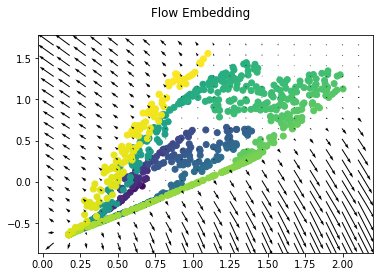

 57%|█████▋    | 57/100 [05:03<03:51,  5.38s/it]

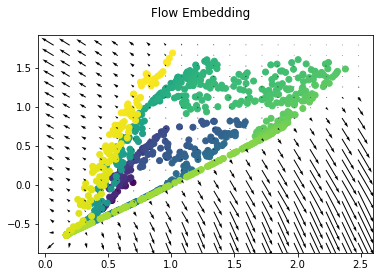

 58%|█████▊    | 58/100 [05:08<03:44,  5.34s/it]

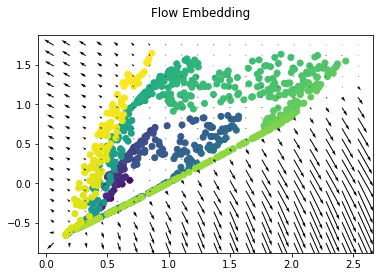

 59%|█████▉    | 59/100 [05:13<03:37,  5.32s/it]

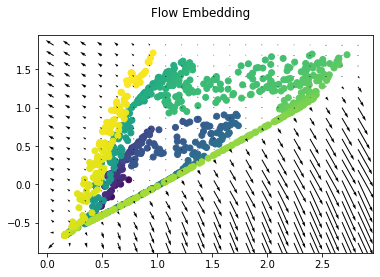

 60%|██████    | 60/100 [05:18<03:31,  5.30s/it]

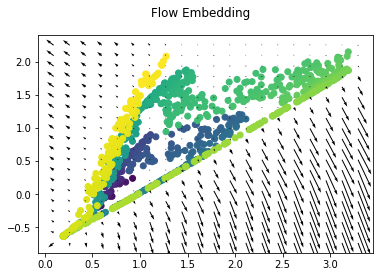

 61%|██████    | 61/100 [05:24<03:27,  5.31s/it]

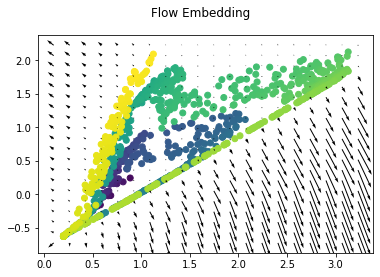

 62%|██████▏   | 62/100 [05:29<03:26,  5.43s/it]

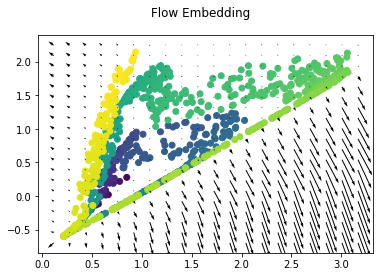

 63%|██████▎   | 63/100 [05:35<03:19,  5.39s/it]

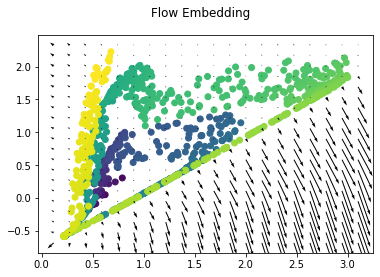

 64%|██████▍   | 64/100 [05:40<03:14,  5.41s/it]

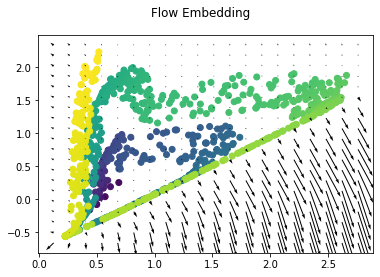

 65%|██████▌   | 65/100 [05:46<03:08,  5.38s/it]

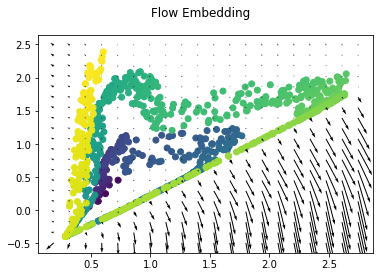

 66%|██████▌   | 66/100 [05:51<03:01,  5.35s/it]

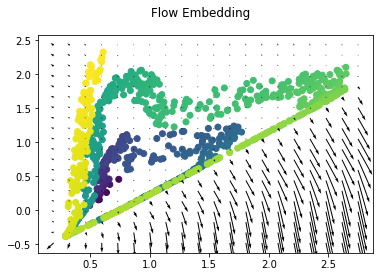

 67%|██████▋   | 67/100 [05:56<02:55,  5.33s/it]

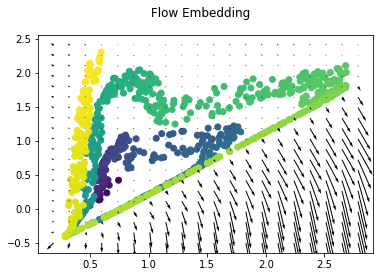

 68%|██████▊   | 68/100 [06:01<02:49,  5.31s/it]

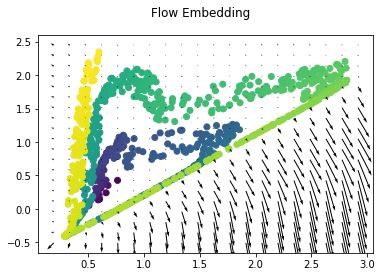

 69%|██████▉   | 69/100 [06:07<02:46,  5.36s/it]

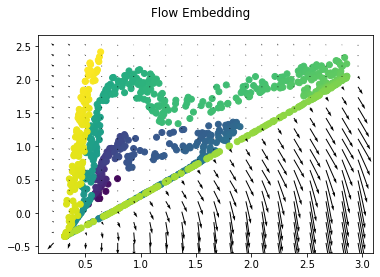

 70%|███████   | 70/100 [06:12<02:40,  5.34s/it]

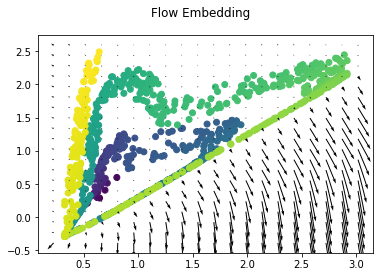

 71%|███████   | 71/100 [06:18<02:36,  5.39s/it]

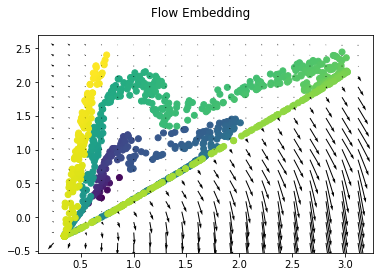

 72%|███████▏  | 72/100 [06:23<02:30,  5.37s/it]

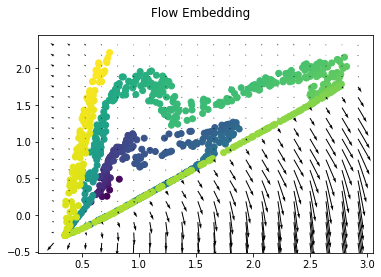

 73%|███████▎  | 73/100 [06:28<02:24,  5.34s/it]

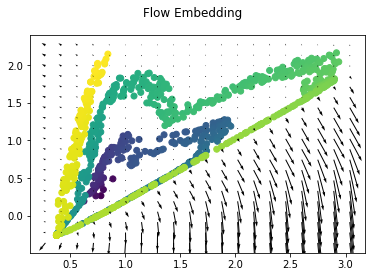

 74%|███████▍  | 74/100 [06:34<02:18,  5.32s/it]

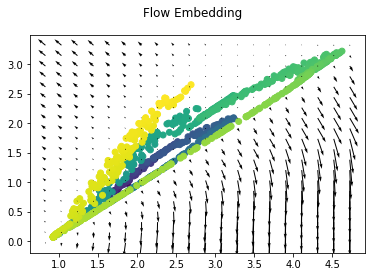

 88%|████████▊ | 88/100 [07:48<01:03,  5.32s/it]

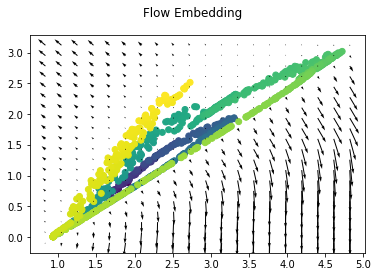

 89%|████████▉ | 89/100 [07:53<00:58,  5.34s/it]

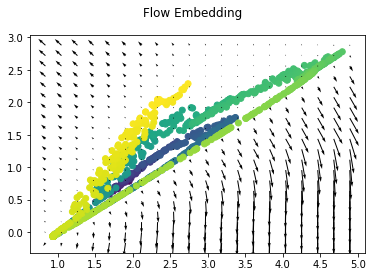

 90%|█████████ | 90/100 [07:59<00:53,  5.35s/it]

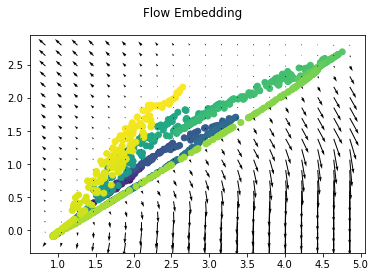

 91%|█████████ | 91/100 [08:04<00:48,  5.43s/it]

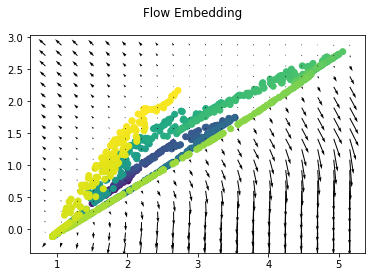

 92%|█████████▏| 92/100 [08:10<00:43,  5.41s/it]

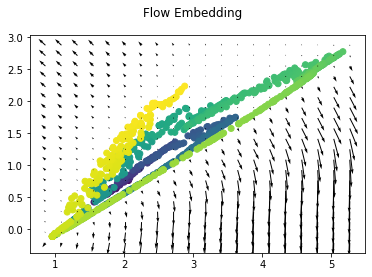

 93%|█████████▎| 93/100 [08:15<00:37,  5.38s/it]

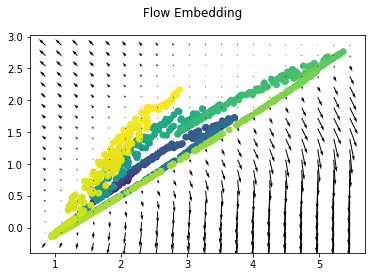

 94%|█████████▍| 94/100 [08:20<00:32,  5.35s/it]

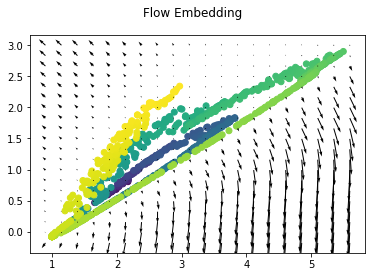

 95%|█████████▌| 95/100 [08:25<00:26,  5.34s/it]

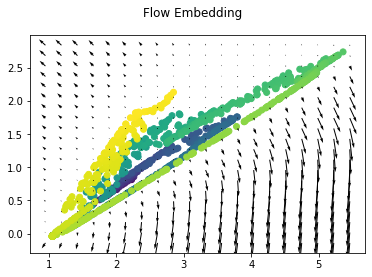

 96%|█████████▌| 96/100 [08:31<00:21,  5.33s/it]

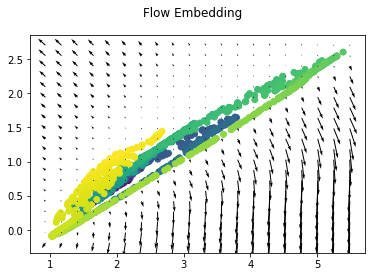

 97%|█████████▋| 97/100 [08:36<00:16,  5.37s/it]

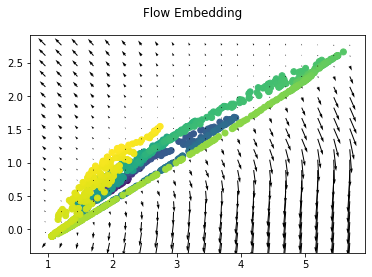

 98%|█████████▊| 98/100 [08:41<00:10,  5.35s/it]

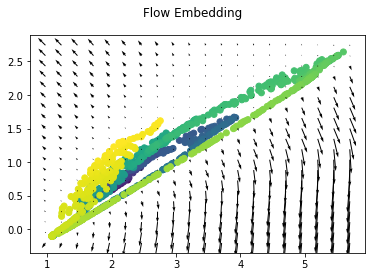

 99%|█████████▉| 99/100 [08:47<00:05,  5.32s/it]

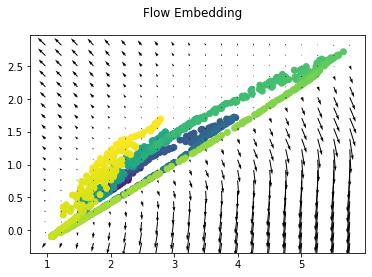

100%|██████████| 100/100 [08:52<00:00,  5.33s/it]


In [6]:
BOBO_FET.fit()

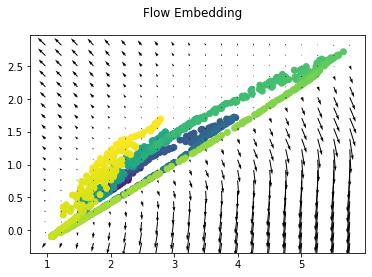

In [7]:
BOBO_FET.visualize_embedding()

In [8]:
BOBO_FET.training_gif()

HTML(value='<img src="data:image/gif;base64,R0lGODlhsAEgAYcAAP///////f//+///+f//9P//6f//1///tP7///z///v///n///…

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

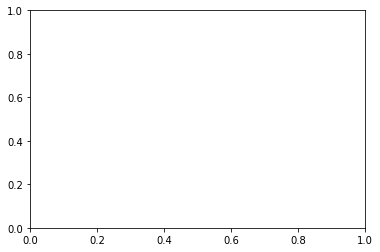

In [9]:
BOBO_FET.visualize_loss()

In [12]:
BOBO_FET.losses['diffusion']

100

In [19]:
import glob
import ipywidgets as widgets
from PIL import Image
import os
import ipywidgets as widgets
import base64
frames = [Image.open(image) for image in glob.glob(f"visualizations/{BOBO_FET.timestamp}/*.jpg")]
frame_one = frames[0]
frame_one.save(f"{BOBO_FET.title}.gif", format="GIF", append_images=frames,
           save_all=True, duration=300, loop=0)
# display in jupyter notebook
b64 = base64.b64encode(open(f"{BOBO_FET.title}.gif",'rb').read()).decode('ascii')
display(widgets.HTML(f'<img src="data:image/gif;base64,{b64}" />'))

HTML(value='<img src="data:image/gif;base64,R0lGODlhsAEgAYcAAP///////f//+///+f//9P//6f//1///tP7///z///v///n///…